# Executive Questions: Sales Specific Questions

Author: Yue Ling

Year: 2022


# Included Modules and Packages

Code cell containing your includes for modules and packages

In [1]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import psycopg2

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc. 

In [2]:
#
# function to run a select query and return rows in a pandas dataframe
# pandas puts all numeric values from postgres to float
# if it will fit in an integer, change it to integer
#

def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)
    

In [3]:
connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)

In [4]:
cursor = connection.cursor()

# 1.1.1 Total Sales as a Dollar Amount for all of AGM

In [6]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select cast(sum(sa.total_amount) as money) as total_sales
from sales sa



"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_sales
0,"$98,739,408.00"


# 1.1.2 Total Sales as a Dollar Amount by Store

Sort by store name in alphabetical order

In [7]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select cast(sum(sa.total_amount) as money) as total_sales, s.city as store_name
from stores s 
    join sales sa
        on sa.store_id = s.store_id
group by store_name
order by store_name

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_sales,store_name
0,"$25,041,060.00",Berkeley
1,"$19,408,260.00",Dallas
2,"$17,692,404.00",Miami
3,"$14,573,172.00",Nashville
4,"$22,024,512.00",Seattle


# 1.1.3 Total Sales as a Dollar Amount by Month

Sort by month full name in calendar order

In [8]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select cast(sum(sa.total_amount) as money) as total_sales, extract(month from sa.sale_date) as month_number, 
    to_char(sa.sale_date, 'Month') as month_name
from sales sa
group by 2,3
order by 2,3

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_sales,month_number,month_name
0,"$7,803,828.00",1,January
1,"$7,574,280.00",2,February
2,"$8,779,620.00",3,March
3,"$8,251,284.00",4,April
4,"$7,977,840.00",5,May
5,"$8,124,108.00",6,June
6,"$7,993,044.00",7,July
7,"$9,029,808.00",8,August
8,"$7,578,960.00",9,September
9,"$8,895,108.00",10,October


# 1.1.4 Total Sales as a Dollar Amount by Store and Month

Sort by store name in alphabetical order, then by month full name in calendar order

In [9]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select cast(sum(sa.total_amount) as money) as total_sales, s.city as store_name, 
    extract(month from sa.sale_date) as month_number, 
    to_char(sa.sale_date, 'Month') as month_name
from stores s 
    join sales sa
        on sa.store_id = s.store_id
group by store_name, month_number, month_name
order by store_name, month_number, month_name


"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_sales,store_name,month_number,month_name
0,"$1,988,904.00",Berkeley,1,January
1,"$1,930,272.00",Berkeley,2,February
2,"$2,224,500.00",Berkeley,3,March
3,"$2,092,056.00",Berkeley,4,April
4,"$2,019,264.00",Berkeley,5,May
5,"$2,065,140.00",Berkeley,6,June
6,"$2,034,708.00",Berkeley,7,July
7,"$2,286,732.00",Berkeley,8,August
8,"$1,922,256.00",Berkeley,9,September
9,"$2,248,008.00",Berkeley,10,October


# 1.1.5 Total Sales as a Dollar Amount by Day of Week

Sort by day of week in day of week order.

In [10]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select cast(sum(sa.total_amount) as money) as total_sales,  
    extract(dow from sa.sale_date) as dow, 
    to_char(sa.sale_date, 'Day') as day_of_week
from sales sa
group by 2,3
order by 2,3

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_sales,dow,day_of_week
0,"$18,589,068.00",0,Sunday
1,"$13,167,720.00",1,Monday
2,"$6,895,332.00",2,Tuesday
3,"$13,952,556.00",3,Wednesday
4,"$13,834,644.00",4,Thursday
5,"$12,878,628.00",5,Friday
6,"$19,421,460.00",6,Saturday


# 1.1.6 Total Sales as a Dollar Amount by Store and Day of Week

Sort by store name in alphabetical order, then by day of week in day of week order.

In [11]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select cast(sum(sa.total_amount) as money) as total_sales, s.city as store_name, 
    extract(dow from sa.sale_date) as dow, 
    to_char(sa.sale_date, 'Day') as day_of_week
from stores s 
    join sales sa
        on sa.store_id = s.store_id
group by store_name, dow, day_of_week
order by store_name, dow, day_of_week


"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_sales,store_name,dow,day_of_week
0,"$4,694,640.00",Berkeley,0,Sunday
1,"$3,340,116.00",Berkeley,1,Monday
2,"$1,752,036.00",Berkeley,2,Tuesday
3,"$3,546,144.00",Berkeley,3,Wednesday
4,"$3,507,660.00",Berkeley,4,Thursday
5,"$3,273,240.00",Berkeley,5,Friday
6,"$4,927,224.00",Berkeley,6,Saturday
7,"$3,650,748.00",Dallas,0,Sunday
8,"$2,602,980.00",Dallas,1,Monday
9,"$1,352,760.00",Dallas,2,Tuesday


# 1.1.7 Total Number of Sales for all of AGM

In [12]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select cast(count(sa.total_amount) as money) as total_sales
from sales sa



"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_sales
0,"$1,537,617.00"


# 1.1.8 Total Number of Sales by Store

Sort by store name in alphabetical order

In [13]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select cast(count(sa.total_amount) as money) as total_sales, s.city as store_name
from stores s 
    join sales sa
        on sa.store_id = s.store_id
group by store_name
order by store_name


"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_sales,store_name
0,"$390,375.00",Berkeley
1,"$302,120.00",Dallas
2,"$275,074.00",Miami
3,"$227,721.00",Nashville
4,"$342,327.00",Seattle


# 1.1.9 Average Dollar Amount per Sale 

In [14]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select cast (avg(sa.total_amount) as money) as avg_sales
from sales sa


"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,avg_sales
0,$64.22


# 1.1.10 Average Dollar Amount per Sale by Store

Sort by store name in alphabetical order

In [15]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select cast(avg(sa.total_amount) as money) as avg_sales, s.city as store_name
from stores s 
    join sales sa
        on sa.store_id = s.store_id
group by store_name
order by store_name


"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,avg_sales,store_name
0,$64.15,Berkeley
1,$64.24,Dallas
2,$64.32,Miami
3,$64.00,Nashville
4,$64.34,Seattle


# 1.1.11 Data visualization of the most impactful learning: which store made the most money



In [18]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select sum(sa.total_amount) as total_sales_dollar, s.city as store_name
from stores s 
    join sales sa
        on sa.store_id = s.store_id
group by store_name
order by store_name

"""

df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

,total_sales_dollar,store_name
0,25041060,Berkeley
1,19408260,Dallas
2,17692404,Miami
3,14573172,Nashville
4,22024512,Seattle


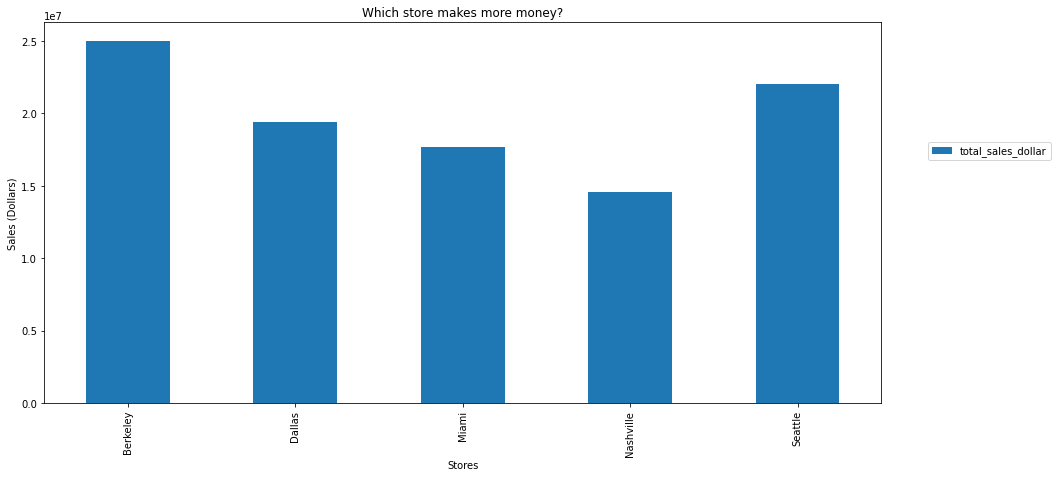

In [19]:
df.plot.bar(figsize=(15,7))

plt.title('Which store makes more money?')
plt.xlabel('Stores')
plt.ylabel('Sales (Dollars)')

plt.xticks(np.arange(5), labels=df['store_name'])
plt.legend(bbox_to_anchor=(1.05, 0.7))
plt.show()

